In [11]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import the dataset
with open('../data/pkl/dataset_class.pkl', 'rb') as f:
    dataset = pickle.load(f)

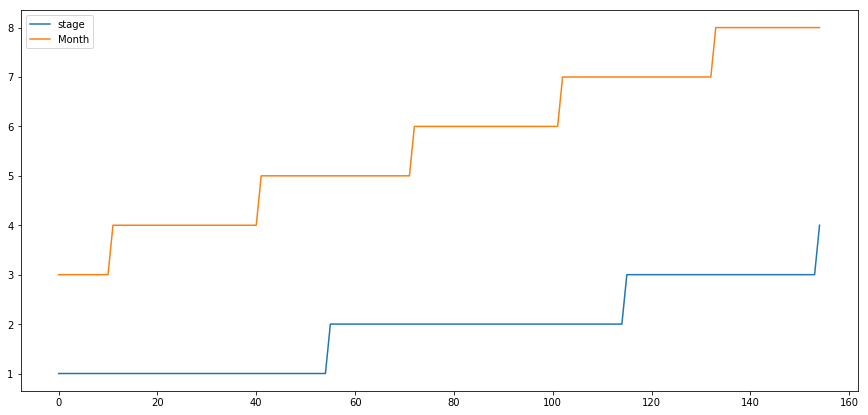

In [12]:
# have for classes
fig, ax = plt.subplots(figsize=(15,7))
dataset[['stage', 'Month']].plot(ax=ax)

In [17]:
with open('../data/pkl/2010to2017.pkl', 'rb') as data:
    data2017 = pickle.load(data)

EOFError: Ran out of input

In [19]:
# data2017.to_csv('../data/csv/2010to2017.csv')
# dataset

,minTemp,maxTemp,Eto_values,DayPrecip,WindSpd,DaySolRad,rain,stage,Month,Day
0,42.9,62.7,0.05,0.01,1.2,210.0,5.06,1.0,3,21
1,36.9,66.9,0.12,0.00,1.1,476.0,5.06,1.0,3,22
2,37.7,68.6,0.12,0.00,1.1,458.0,5.06,1.0,3,23
3,40.6,71.0,0.12,0.00,1.1,456.0,5.06,1.0,3,24
4,40.9,71.6,0.12,0.00,1.1,462.0,5.06,1.0,3,25
5,40.3,72.5,0.13,0.00,1.1,463.0,5.06,1.0,3,26
6,44.6,67.7,0.12,0.00,1.2,447.0,5.06,1.0,3,27
7,40.5,64.1,0.12,0.00,1.2,498.0,5.06,1.0,3,28
8,35.1,65.5,0.12,0.00,1.1,465.0,5.06,1.0,3,29
9,36.2,66.2,0.12,0.00,1.1,478.0,5.06,1.0,3,30


In [18]:
dataset.columns

Index(['minTemp', 'maxTemp', 'Eto_values', 'DayPrecip', 'WindSpd', 'DaySolRad',
       'rain', 'stage', 'Month', 'Day'],
      dtype='object')

In [7]:
dataset['stage'] = np.array(dataset['stage'], dtype=int)

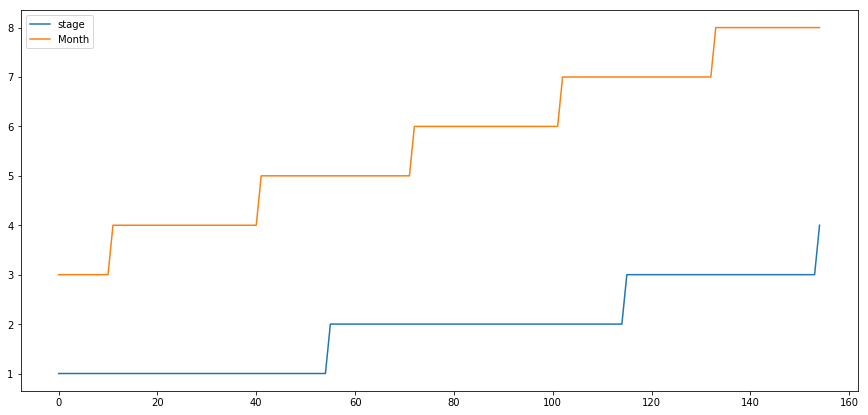

In [8]:
fig, ax = plt.subplots(figsize=(15,7))
dataset[['stage', 'Month']].plot(ax=ax)

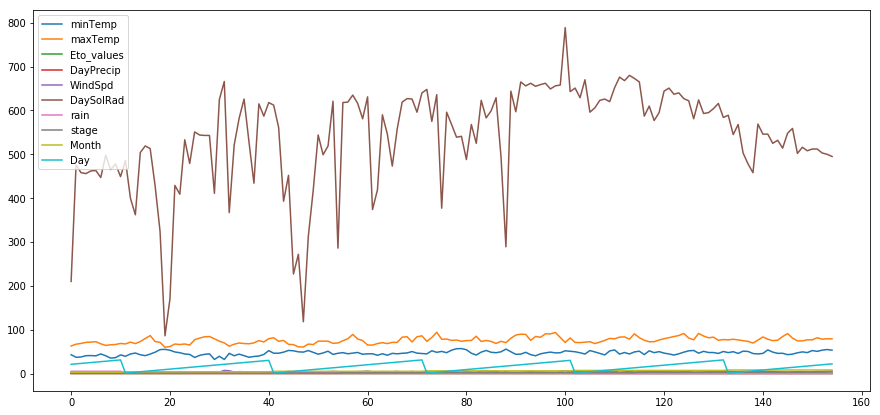

In [9]:
fig, ax = plt.subplots(figsize=(15,7))

dataset.plot(ax=ax)

In [10]:
dataset

,minTemp,maxTemp,Eto_values,DayPrecip,WindSpd,DaySolRad,rain,stage,Month,Day
0,42.9,62.7,0.05,0.01,1.2,210.0,5.06,1,3,21
1,36.9,66.9,0.12,0.00,1.1,476.0,5.06,1,3,22
2,37.7,68.6,0.12,0.00,1.1,458.0,5.06,1,3,23
3,40.6,71.0,0.12,0.00,1.1,456.0,5.06,1,3,24
4,40.9,71.6,0.12,0.00,1.1,462.0,5.06,1,3,25
5,40.3,72.5,0.13,0.00,1.1,463.0,5.06,1,3,26
6,44.6,67.7,0.12,0.00,1.2,447.0,5.06,1,3,27
7,40.5,64.1,0.12,0.00,1.2,498.0,5.06,1,3,28
8,35.1,65.5,0.12,0.00,1.1,465.0,5.06,1,3,29
9,36.2,66.2,0.12,0.00,1.1,478.0,5.06,1,3,30
